## Laboratorio de Redes Neuronales 

En esta hoja de Jupyter desarrollaremos un código simple para una red neuronal basada en neuronas tipo perceptron. Con el objetivo de entender mejor su funcionamiento, desarrollaremos parte del código siguiendo la teoría desarrollada en el curso.

In [2]:
from sklearn.datasets import make_blobs # Dataset de prueba
import matplotlib.pyplot as plt # Librería 
import numpy as np

Para la implementación de nuestra red neuronal, requerimos de un dataset para entrenar nuestra red neuronal. En este caso, utilizaremos el mismo dataset empleado para el algoritmo de k-means (o k-medios). Este lo invocamos a partir de una función generadora de datos de entrenamiento que es parte de la librería scikit-learn.

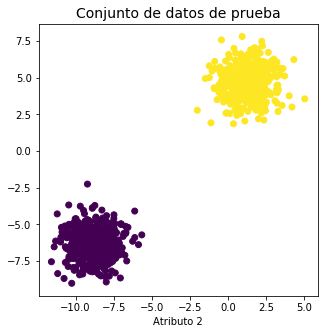

In [3]:
# Generamos el Dataset
X, Y = make_blobs(n_features=2, centers=2, n_samples=1000)

# Podemos visualizarlo utilizando la función Scatter de Matplotlib. 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title('Conjunto de datos de prueba', fontsize=14)
plt.xlabel('Atributo 1')
plt.xlabel('Atributo 2')
plt.show()

A simple vista podemos observar que ambos clusters pueden separarse por una linea. 

Encontrar esa linea de separación será el objetivo de nuestra red neuronal.

Primero, agregamos el termino de sesgo igual a 1.

In [4]:
# Agregamos el sesgo al vector X1
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X

E inicializamos los pesos con ceros. 

In [5]:
# Inicialización
w = np.zeros([3, 1])

Finalmente, antes de entrenar el perceptron, definamos algunas funciones que nos harán la vida mas fácil. 

1) Una función de activación que nos devuelve 0 o 1 dependiendo de la entrada.

In [6]:
def activation(x):
    return 1 if x >= 1 else 0

2) Una función para calcular el vector unitario asociado a los vectores de pesos.

In [7]:
def calc_unit_vector(x):
    return x.transpose() / np.sqrt(x.transpose().dot(x))

3) Una función que devuelva valores que caen en un hiperplano. En este ejemplo será simplemente una linea recta.

In [8]:
def calc_hyperplane(X, w):
    return np.ravel([-(w[0] + x * w[1]) / w[2] for x in X])

En este punto, solo nos hace falta escribir el algoritmo del perceptron y ejecutarlo:

In [9]:
# Aplicación de la regla de aprendizaje del perceptron
for iteracion in range(10):
    for i in range(X_bias.shape[0]):
        y = activation(w.transpose().dot(X_bias[i, :]))

        # Actualización de los pesos
        w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)

y procedemos a determinar la clase de cada punto de acuerdo con el vector de pesos que encuentra nuestro perceptron:

In [10]:
# Cálculo de la clase de los puntos en nuestro conjunto de datos utilizando el vector de pesos
result = [w.transpose().dot(x) for x in X_bias]
result_class = [activation(w.transpose().dot(x)) for x in X_bias]

Calculamos el vector unitario de pesos:

In [13]:
# Cálculo del vector unitario:
w = calc_unit_vector(w).transpose()

Y finalmente graficamos los resultados:

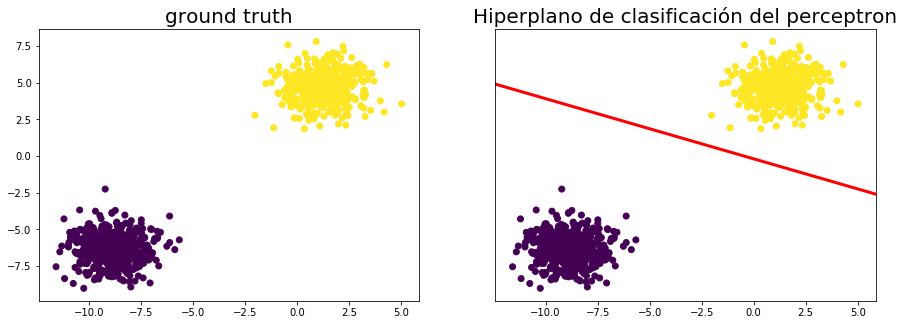

In [12]:
# Visualización de los resultados
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
ax[0].set_title('ground truth', fontsize=20)

ax[1].scatter(X[:, 0], X[:, 1], c=result_class)
ax[1].plot([-20, 20], calc_hyperplane([-20, 20], w), lw=3, c='red')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticks([])
ax[1].set_title('Hiperplano de clasificación del perceptron', fontsize=20)

plt.show()